# XYZ G2M  Exploratory Data Analysis
-----

### Name: Nicolette Peterkin
### Title: XYZ Data Scientist
### Date: June 14, 2021
-----

## Introduction 

The cab industry in the United States has grown significantly, and as a result, XYZ firm is interested in investing in the cab sector. They handed over four datasets to the senior Data Scientist to analyse and give actionable insights. The goal of this project is to clean, append, join, and analyse the datasets provided in order to provide sufficient advice to XYZ's Executive team on the most lucrative cab company. 

If you so choose to explore further into the dataset, please click  [here](https://github.com/DataGlacier/DataSets.git). 


## Business Problem

Buying into a new industry requires a lot of research and data analysing to ensure that the right Go-to-Market(G2M) strategy is used to enter the market. The issue XYZ is having currently is that they do not understand the cab industry market in which they are thinking to invest. 

## Solution 

As a Data Scientist my job is to analyse the given data with much scrutiny in order to provide XYZ with vital insights into the cab industry. Once the exploratory data analyse report is completed XYZ will have actionable insights which can then be used to inform their G2M strategy. 

## Hypothesis to Test

1. Which company has maximum cab users at a particular time period?
2. Does margin proportionally increase with increase in number of customers?
3. What are the attributes of these customer segments?
4. What age range of customer use cabs the most?
5. Is there a correlation between price charged and cost of trip?

### Loading the necessary libraries 

In [1]:
# Here I am importing all the libraries that will be needed.

import matplotlib.pyplot as plt 
import numpy as np 
import pandas as pd 
import seaborn as sns

### Importing the Datasets

In [2]:
# Here I am reading in the necessary data files and assigning them to variable names.

cab_df = pd.read_csv('C:\\Users\\peter\\code\\DataSets\Cab_Data.csv')

city_df = pd.read_csv('C:\\Users\\peter\\code\\DataSets\City.csv')

customer_df = pd.read_csv('C:\\Users\\peter\\code\\DataSets\Customer_ID.csv')

transaction_df = pd.read_csv('C:\\Users\\peter\\code\\DataSets\Transaction_ID.csv')


## Data Understanding 


Each file (data set) provided represents different aspects of the customer profile. XYZ is interested in using my actionable insights to help them identify the right company to make their investment.

Data Set:

I have been provided 4 individual data sets. Time period of data is from 31/01/2016 to 31/12/2018.

Below are the list of datasets which are provided for the analysis:

- `Cab_Data.csv`: this file includes details of transaction for 2 cab companies

- `Customer_ID.csv`: this is a mapping table that contains a unique identifier which links the customer’s demographic details

- `Transaction_ID.csv`: this is a mapping table that contains transaction to customer mapping and payment mode

- `City.csv`: this file contains list of US cities, their population and number of cab users

#### Display Data Frames

Here I am checking if the data was imported correctly. A visual represntation was created to test if data was actually imported. 

In [3]:
cab_df.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,"January 08, 2016",Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,"January 06, 2016",Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,"January 02, 2016",Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,"January 07, 2016",Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,"January 03, 2016",Pink Cab,ATLANTA GA,8.73,114.62,97.776


In [4]:
city_df.head()

,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"


In [5]:
customer_df.head()

,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536


In [6]:
transaction_df.head()

,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card


- In the given datasets all were comma separated files (csv)
- I took a closer look at the data with the help of `.head()` function of the pandas library which returns the first 5 data of the dateset.

#### Understand the field names and data types

In order to understand the different data frames I will be exploring the data structures.


I found out the total number of rows and columns in the datasets using `.shape` attribute.

In [7]:
cab_df.shape


(359392, 7)

- The Cab dataset comprises of 359392 observations and 7 charactertics.

In [8]:
city_df.shape

(20, 3)

- The City dataset comprises of 20 observations and 3 charactertics.

In [9]:
customer_df.shape

(49171, 4)

- The Customer dataset comprises of 49171 observations and 4 charactertics.

In [10]:
transaction_df.shape

(440098, 3)

- The Transaction dataset comprises of 440098 observations and 3 charactertics.

I will now observe the columns and their corresponding data types to have a better understanding as well as find whether they contain null values or not. 

In [11]:
cab_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Transaction ID  359392 non-null  int64  
 1   Date of Travel  359392 non-null  object 
 2   Company         359392 non-null  object 
 3   City            359392 non-null  object 
 4   KM Travelled    359392 non-null  float64
 5   Price Charged   359392 non-null  float64
 6   Cost of Trip    359392 non-null  float64
dtypes: float64(3), int64(1), object(3)
memory usage: 19.2+ MB


- Data above has floats, integer and strings 
- No variable has null or missing values 

In [12]:
city_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   City        20 non-null     object
 1   Population  20 non-null     object
 2   Users       20 non-null     object
dtypes: object(3)
memory usage: 608.0+ bytes


- Data above has only string values 
- No variable has null or missing values

In [13]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49171 entries, 0 to 49170
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Customer ID         49171 non-null  int64 
 1   Gender              49171 non-null  object
 2   Age                 49171 non-null  int64 
 3   Income (USD/Month)  49171 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


- Data above has only integer and string
- No variable has null or missing values

In [14]:
transaction_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440098 entries, 0 to 440097
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Transaction ID  440098 non-null  int64 
 1   Customer ID     440098 non-null  int64 
 2   Payment_Mode    440098 non-null  object
dtypes: int64(2), object(1)
memory usage: 10.1+ MB


- Data above has only integer and string 
- No variable has null or missing values

#### Observations

From the code above the following observations were made:

1. The Column names used contains whitespaces instead of python preferred snakecase. 
2. There seems to be some relationship between dataframes.
3. The dataframes contains no null values.


#### Next Steps:
 
 1. I will have to change whitespaces to snakecases.
 2. I will investigate further for cardinality and normalization.
 

#### Field/feature transformations

The code directly below shows the column names before and after the change to python's preferred snakecase for each dataframe: 

In [15]:
cab_df.columns

Index(['Transaction ID', 'Date of Travel', 'Company', 'City', 'KM Travelled',
       'Price Charged', 'Cost of Trip'],
      dtype='object')

In [16]:
column_names =  list(cab_df.columns)
for col in column_names:
    column_names[column_names.index(col)] = col.replace(' ','_')
    
cab_df.columns = column_names
cab_df.head(0)

,Transaction_ID,Date_of_Travel,Company,City,KM_Travelled,Price_Charged,Cost_of_Trip


In [17]:
city_df.columns

Index(['City', 'Population', 'Users'], dtype='object')

In [18]:
column_names =  list(city_df.columns)
for col in column_names:
    column_names[column_names.index(col)] = col.replace(' ','_')
    
city_df.columns = column_names
city_df.head(0)

,City,Population,Users


In [19]:
customer_df.columns

Index(['Customer ID', 'Gender', 'Age', 'Income (USD/Month)'], dtype='object')

In [20]:
column_names =  list(customer_df.columns)
for col in column_names:
    column_names[column_names.index(col)] = col.replace(' ','_')
    
customer_df.columns = column_names
customer_df.head(0)

,Customer_ID,Gender,Age,Income_(USD/Month)


In [21]:
transaction_df.columns

Index(['Transaction ID', 'Customer ID', 'Payment_Mode'], dtype='object')

In [22]:
column_names =  list(transaction_df.columns)
for col in column_names:
    column_names[column_names.index(col)] = col.replace(' ','_')
    
transaction_df.columns = column_names
transaction_df.head(0)

,Transaction_ID,Customer_ID,Payment_Mode


I have realised that some data types need to be changed and as such I will perform those transformations here. 

In [23]:
# Transform Transaction ID to string data type
cab_df['Transaction_ID'] = cab_df['Transaction_ID'].astype(str)
cab_df.dtypes

Transaction_ID     object
Date_of_Travel     object
Company            object
City               object
KM_Travelled      float64
Price_Charged     float64
Cost_of_Trip      float64
dtype: object

In [24]:
# Transform Population to Integer data type
city_df['Population'] = city_df['Population'].str.replace(',','')
city_df['Population'] = city_df['Population'].astype(int)
city_df.dtypes

City          object
Population     int32
Users         object
dtype: object

In [25]:
# Transform Users to Integer data type
city_df['Users'] = city_df['Users'].str.replace(',','')
city_df['Users'] = city_df['Users'].astype(int)
city_df.dtypes

City          object
Population     int32
Users          int32
dtype: object

In [26]:
# Transform Customer ID to string data type
customer_df['Customer_ID'] = customer_df['Customer_ID'].astype(str)
customer_df.dtypes

Customer_ID           object
Gender                object
Age                    int64
Income_(USD/Month)     int64
dtype: object

In [27]:
# Transform Income to float data type
customer_df['Income_(USD/Month)'] = customer_df['Income_(USD/Month)'].astype(float)
customer_df.dtypes

Customer_ID            object
Gender                 object
Age                     int64
Income_(USD/Month)    float64
dtype: object

In [28]:
# Transform Transaction ID to string data type
transaction_df['Transaction_ID'] = transaction_df['Transaction_ID'].astype(str)
transaction_df.dtypes

Transaction_ID    object
Customer_ID        int64
Payment_Mode      object
dtype: object

In [29]:
# Transform Customer ID to string data type
transaction_df['Customer_ID'] = transaction_df['Customer_ID'].astype(str)
transaction_df.dtypes

Transaction_ID    object
Customer_ID       object
Payment_Mode      object
dtype: object

Now I am going to identify the relationship between the dataframes as well as determine which ones should be joined and which ones should be appended. Before I am able to join the datasets I will need to identify which dataframe contains the primary key and the foreign key. This will help in determining the cardinality of the relationship between dataframes.

From the field name transformations above I have identified the following relationships:

- the cab dataframe has a relationship with the transaction dataframe
- the cab dataframe has a relationship with the city dataframe 
- the customer dataframe has a relationship with the transaction dataframe 
 

From prior knowledge I know that the primary key is the main identifier for the dataframe and it should have no duplicates, Hence, it identifies each observation uniquely. This means that I can identify which dataframe contains the primary key along with which ones contain foreign keys and/or composite keys.


**Here I analyse both the cab and transaction dataframes:** 

In [30]:
transaction_df.Transaction_ID.nunique()

440098

In [31]:
transaction_df.Transaction_ID.value_counts()

10170188    1
10357666    1
10110900    1
10323450    1
10184518    1
           ..
10397601    1
10402839    1
10391382    1
10137711    1
10162218    1
Name: Transaction_ID, Length: 440098, dtype: int64

In [32]:
cab_df.Transaction_ID.nunique()

359392

In [33]:
cab_df.Transaction_ID.value_counts()

10377513    1
10264880    1
10314979    1
10365364    1
10036306    1
           ..
10018542    1
10334905    1
10067116    1
10160012    1
10170738    1
Name: Transaction_ID, Length: 359392, dtype: int64


> Here I realised that both transaction IDs for each dataset uniquely identify each observation as such it gives me insight into the type of join I will conduct

In [34]:
customer_df.Customer_ID.nunique()

49171

In [35]:
customer_df.Customer_ID.value_counts()

8594     1
207      1
33212    1
23446    1
53997    1
        ..
18898    1
43862    1
58217    1
25476    1
56100    1
Name: Customer_ID, Length: 49171, dtype: int64

> Each customer ID represents one observation in the customer dataframe. This gives great insight into how I will join the different datasets

In [36]:
city_df.City.nunique()

20

In [37]:
city_df.City.value_counts()

ATLANTA GA          1
AUSTIN TX           1
CHICAGO IL          1
SILICON VALLEY      1
NEW YORK NY         1
BOSTON MA           1
PITTSBURGH PA       1
MIAMI FL            1
ORANGE COUNTY       1
SACRAMENTO CA       1
TUCSON AZ           1
WASHINGTON DC       1
SEATTLE WA          1
DENVER CO           1
SAN DIEGO CA        1
DALLAS TX           1
LOS ANGELES CA      1
SAN FRANCISCO CA    1
PHOENIX AZ          1
NASHVILLE TN        1
Name: City, dtype: int64

> Each city represents one observation in the city dataframe. This gives great insight into how I will join the different datasets

Base on my observation it is my opinion that none of the datasets needs to be appended. Hence, I will join (merge) the necessary columns. 

In [38]:
dataset = pd.merge(cab_df,transaction_df, how = 'inner', on = 'Transaction_ID') 
dataset

,Transaction_ID,Date_of_Travel,Company,City,KM_Travelled,Price_Charged,Cost_of_Trip,Customer_ID,Payment_Mode
0,10000011,"January 08, 2016",Pink Cab,ATLANTA GA,30.45,370.95,313.6350,29290,Card
1,10000012,"January 06, 2016",Pink Cab,ATLANTA GA,28.62,358.52,334.8540,27703,Card
2,10000013,"January 02, 2016",Pink Cab,ATLANTA GA,9.04,125.20,97.6320,28712,Cash
3,10000014,"January 07, 2016",Pink Cab,ATLANTA GA,33.17,377.40,351.6020,28020,Cash
4,10000015,"January 03, 2016",Pink Cab,ATLANTA GA,8.73,114.62,97.7760,27182,Card
...,...,...,...,...,...,...,...,...,...
359387,10440101,"January 08, 2018",Yellow Cab,WASHINGTON DC,4.80,69.24,63.3600,52392,Cash
359388,10440104,"January 04, 2018",Yellow Cab,WASHINGTON DC,8.40,113.75,106.8480,53286,Cash
359389,10440105,"January 05, 2018",Yellow Cab,WASHINGTON DC,27.75,437.07,349.6500,52265,Cash
359390,10440106,"January 05, 2018",Yellow Cab,WASHINGTON DC,8.80,146.19,114.0480,52175,Card


In [39]:
dataset = pd.merge(dataset, customer_df, how = 'inner', on = 'Customer_ID')
dataset

,Transaction_ID,Date_of_Travel,Company,City,KM_Travelled,Price_Charged,Cost_of_Trip,Customer_ID,Payment_Mode,Gender,Age,Income_(USD/Month)
0,10000011,"January 08, 2016",Pink Cab,ATLANTA GA,30.45,370.95,313.6350,29290,Card,Male,28,10813.0
1,10351127,"July 21, 2018",Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,29290,Cash,Male,28,10813.0
2,10412921,"November 23, 2018",Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,29290,Card,Male,28,10813.0
3,10000012,"January 06, 2016",Pink Cab,ATLANTA GA,28.62,358.52,334.8540,27703,Card,Male,27,9237.0
4,10320494,"April 21, 2018",Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,27703,Card,Male,27,9237.0
...,...,...,...,...,...,...,...,...,...,...,...,...
359387,10439790,"January 07, 2018",Yellow Cab,SEATTLE WA,16.66,261.18,213.9144,38520,Card,Female,42,19417.0
359388,10439799,"January 03, 2018",Yellow Cab,SILICON VALLEY,13.72,277.97,172.8720,12490,Cash,Male,33,18713.0
359389,10439838,"January 04, 2018",Yellow Cab,TUCSON AZ,19.00,303.77,232.5600,41414,Card,Male,38,3960.0
359390,10439840,"January 06, 2018",Yellow Cab,TUCSON AZ,5.60,92.42,70.5600,41677,Cash,Male,23,19454.0


In [40]:
dataset = pd.merge(dataset, city_df, how = 'inner', on = 'City')
dataset

,Transaction_ID,Date_of_Travel,Company,City,KM_Travelled,Price_Charged,Cost_of_Trip,Customer_ID,Payment_Mode,Gender,Age,Income_(USD/Month),Population,Users
0,10000011,"January 08, 2016",Pink Cab,ATLANTA GA,30.45,370.95,313.6350,29290,Card,Male,28,10813.0,814885,24701
1,10351127,"July 21, 2018",Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,29290,Cash,Male,28,10813.0,814885,24701
2,10412921,"November 23, 2018",Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,29290,Card,Male,28,10813.0,814885,24701
3,10000012,"January 06, 2016",Pink Cab,ATLANTA GA,28.62,358.52,334.8540,27703,Card,Male,27,9237.0,814885,24701
4,10320494,"April 21, 2018",Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,27703,Card,Male,27,9237.0,814885,24701
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359387,10307228,"March 03, 2018",Yellow Cab,WASHINGTON DC,38.40,668.93,525.3120,51406,Cash,Female,29,6829.0,418859,127001
359388,10319775,"April 13, 2018",Yellow Cab,WASHINGTON DC,3.57,67.60,44.5536,51406,Cash,Female,29,6829.0,418859,127001
359389,10347676,"July 06, 2018",Yellow Cab,WASHINGTON DC,23.46,331.97,337.8240,51406,Card,Female,29,6829.0,418859,127001
359390,10358624,"August 02, 2018",Yellow Cab,WASHINGTON DC,27.60,358.23,364.3200,51406,Cash,Female,29,6829.0,418859,127001


In the  code cell above I have created the master list and now I will examine the relationships between the attributes.

#### Descriptive Summary

Now I will find the descriptive statistics for the dataset and see what insights I can glean from the said statistics.

In [41]:
dataset.describe(include = 'all')

,Transaction_ID,Date_of_Travel,Company,City,KM_Travelled,Price_Charged,Cost_of_Trip,Customer_ID,Payment_Mode,Gender,Age,Income_(USD/Month),Population,Users
count,359392,359392,359392,359392,359392.000000,359392.000000,359392.000000,359392,359392,359392,359392.000000,359392.000000,3.593920e+05,359392.000000
unique,359392,1095,2,19,NaN,NaN,NaN,46148,2,2,NaN,NaN,NaN,NaN
top,10427118,"January 05, 2018",Yellow Cab,NEW YORK NY,NaN,NaN,NaN,494,Card,Male,NaN,NaN,NaN,NaN
freq,1,2022,274681,99885,NaN,NaN,NaN,54,215504,205912,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,22.567254,423.443311,286.190113,NaN,NaN,NaN,35.336705,15048.822937,3.132198e+06,158365.582267
std,NaN,NaN,NaN,NaN,12.233526,274.378911,157.993661,NaN,NaN,NaN,12.594234,7969.409482,3.315194e+06,100850.051020
min,NaN,NaN,NaN,NaN,1.900000,15.600000,19.000000,NaN,NaN,NaN,18.000000,2000.000000,2.489680e+05,3643.000000
25%,NaN,NaN,NaN,NaN,12.000000,206.437500,151.200000,NaN,NaN,NaN,25.000000,8424.000000,6.712380e+05,80021.000000
50%,NaN,NaN,NaN,NaN,22.440000,386.360000,282.480000,NaN,NaN,NaN,33.000000,14685.000000,1.595037e+06,144132.000000
75%,NaN,NaN,NaN,NaN,32.960000,583.660000,413.683200,NaN,NaN,NaN,42.000000,21035.000000,8.405837e+06,302149.000000


From the table above the following can be seen: 
1. The most travelled date is January 05,2018
2. Yellow Cab has the highest frequency of the two cabs
3. New York is the most popular city
4. Males use cab more than females 
5. Customer with ID 54 is the most frequent user
6. Most common payment mode is by card

#### Univariate Plots

<AxesSubplot:xlabel='Company', ylabel='count'>

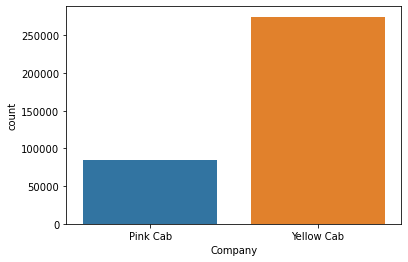

In [42]:
sns.countplot(x = 'Company', data = dataset)

> From the graph above it is evident that Yellow cab has more users.

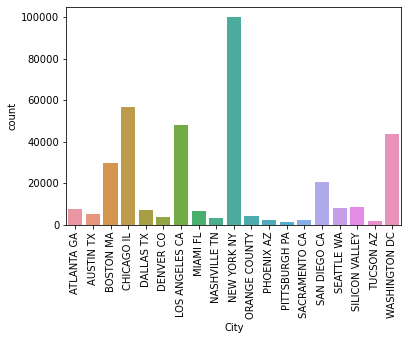

In [43]:
barplot = sns.countplot(x = 'City', data = dataset)
plt.xticks(rotation = 90)
plt.show()

> From the graph above it is evident that New York City has the highest amount of users.

<AxesSubplot:xlabel='Gender', ylabel='count'>

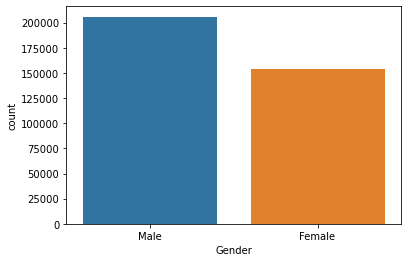

In [44]:
sns.countplot(x = 'Gender', data = dataset)

> From the graph above it is evident that males use cab companies more than females.

<AxesSubplot:xlabel='Payment_Mode', ylabel='count'>

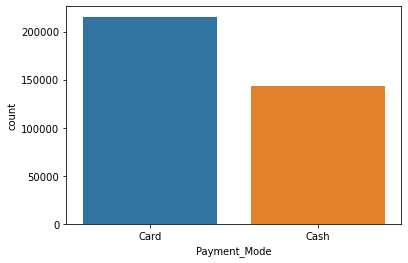

In [45]:
sns.countplot(x = 'Payment_Mode', data = dataset)

> From the graph above it is evident that card is the preferred method of payment.

C:\Users\peter\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

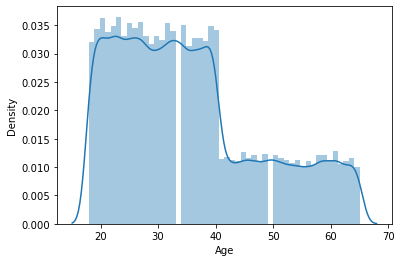

In [46]:
sns.distplot(dataset['Age'])

> From the graph above it is evident that users are of a wide variety (All Ages).

C:\Users\peter\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='KM_Travelled', ylabel='Density'>

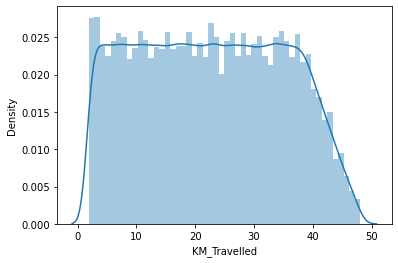

In [47]:
sns.distplot(dataset['KM_Travelled'])

> From the graph above it is evident that the KM Travelled density is widely spread from around 2km to 49km.

C:\Users\peter\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price_Charged', ylabel='Density'>

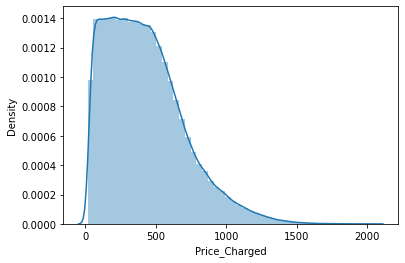

In [48]:
sns.distplot(dataset['Price_Charged'])

> From the graph above it is evident that Price charged majority is in the range of 2 dollars to roughly around 800 dollars.

C:\Users\peter\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Cost_of_Trip', ylabel='Density'>

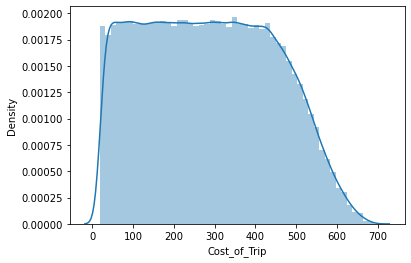

In [49]:
sns.distplot(dataset['Cost_of_Trip'])

> From the graph above it is evident that the Cost of Trip is spread from 2 to 600 dollars.

C:\Users\peter\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Income_(USD/Month)', ylabel='Density'>

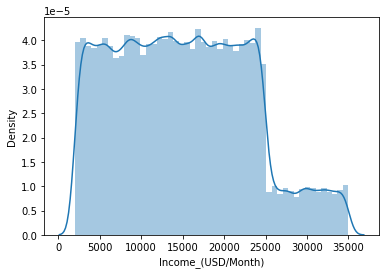

In [50]:
sns.distplot(dataset['Income_(USD/Month)'])

> From the graph above it is evident that the income of the customers are mainly between the income bracket of around 200 to 24000.

<AxesSubplot:>

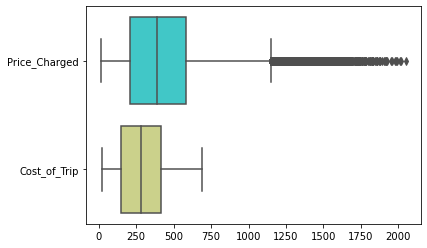

In [51]:
sns.boxplot(data = dataset[['Price_Charged','Cost_of_Trip']], palette = "rainbow", orient = 'h')

<AxesSubplot:>

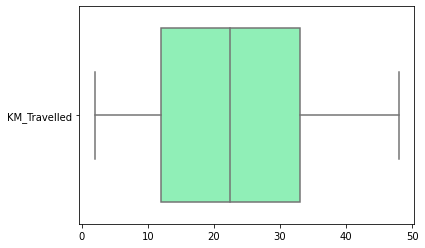

In [52]:
sns.boxplot(data = dataset[['KM_Travelled']], palette = "rainbow", orient = 'h')

<AxesSubplot:>

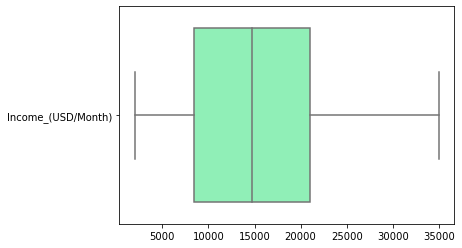

In [53]:
sns.boxplot(data = dataset[['Income_(USD/Month)']], palette = "rainbow", orient = 'h')

<AxesSubplot:>

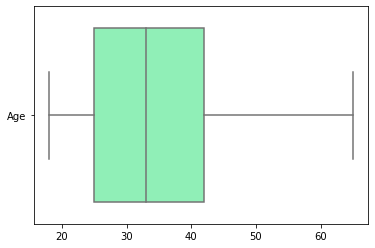

In [54]:
sns.boxplot(data = dataset[['Age']], palette = "rainbow", orient = 'h')

From my investigation it was evident that only Price Charged has outliers. 

#### Multivariate/Bivariate Plots

In [55]:
dataset.corr()

,KM_Travelled,Price_Charged,Cost_of_Trip,Age,Income_(USD/Month),Population,Users
KM_Travelled,1.000000,0.835753,0.981848,-0.000369,-0.000544,-0.002311,-0.000428
Price_Charged,0.835753,1.000000,0.859812,-0.003084,0.003228,0.326589,0.281061
Cost_of_Trip,0.981848,0.859812,1.000000,-0.000189,-0.000633,0.015108,0.023628
Age,-0.000369,-0.003084,-0.000189,1.000000,0.003907,-0.009002,-0.005906
Income_(USD/Month),-0.000544,0.003228,-0.000633,0.003907,1.000000,0.011868,0.010464
Population,-0.002311,0.326589,0.015108,-0.009002,0.011868,1.000000,0.915490
Users,-0.000428,0.281061,0.023628,-0.005906,0.010464,0.915490,1.000000


<AxesSubplot:>

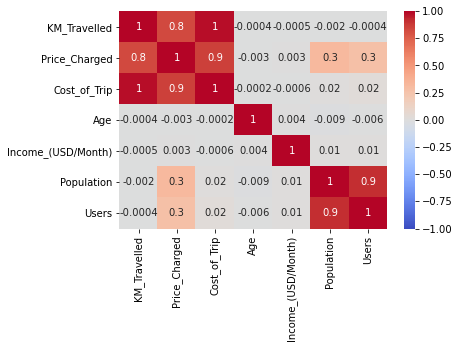

In [56]:
sns.heatmap(dataset.corr(), annot = True, vmin = -1, vmax =1, cmap = 'coolwarm', fmt = '.1g')

The table and graph above show the correlation of the fields KM Travelled, Price Charged, Cost of Trip,	Age, Income (USD/Month)	Population and Users. There is a strongly postive correlation relationship between KM Travelled, Price Changed and Cost of Trip. Whilst there is little to no correlation between Income, Age, Population and Users. 

## Hypothesis Results

1. Yellow Cab has the most cab users on January 05, 2018.
2. Yes, margin proportionally increase with th increase in number of customers.
3. The attributes of the customer segments are Customer ID, Gender, Age and Income which are both user-defined numeric or discrete attributes.
4. According to the statistic the mean age of users are 35 years old. 
5. There is a strongly postive correaltion between price charged and cost of trip

## EDA Recommendation in support of investing in Yellow Cab Company 

Based on the data analysis carried out here are the recommendation derived: 

1. Earnings - While the Pink cab is making profits on rides the Yellow cab is almost making three times as much.
2. Customer - Based on the master data it shows that more customer ride with the Yellow cab on a constant basis. 
3. City - Yellow cab is doing great in the top city (New York) which has the highest population. 

Therefore, it is safe to recommend Yellow Cab to XYZ as the right cab company to invest in for their G2M strategy. 